# Packages

### Downloading packages 
#### Select and run just either one of them

### Importing libraries

In [1]:
import mlflow
from mlflow.tracking import MlflowClient

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import binascii

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

import xgboost as xgb
import six 
from six import StringIO  
from IPython.display import Image  
import pydotplus

### Reading files and setting variables

In [2]:
path, file = '../../data/', 'dataset.csv'
df = pd.read_csv (os.path.join(path, file), sep = ',')

# Experiments Tracking

## Functions definitions

In [3]:
def log_mlflow_experiment(exp_id, name, tags, metrics, nested=False):
    """
    Logs an Mlflow experiment that includes:
        1. Name
        2. Tags
            - Project name
            - Model
        3. Metrics
            - Accuracy score on train and test sets
            - F1 score on train and test sets

    This function allows to create child run experiments, when "nested" is set to True then the resulting experiment
    will be a child run of the current active experiment, otherwise a new parent run is created.

    No return is expected as the result is the logged experiment.

    Parameters:
        exp_id (str): Experiment ID.
        name (str): Experiment name.
        tags (dict): Dictionary with the experiment tags.
        metrics (dict): Dictionary with the performance metrics of the model.
        nested (bool, defaults to False): Flag to indicate if the experiment to create is a child run.
    """
    # Starting experiment
    mlflow.start_run(experiment_id=exp_id, run_name=name, nested=nested)

    # Logging experiment tags and metrics
    mlflow.set_tags(tags)
    mlflow.log_metrics(metrics)

    # Finishing experiment
    mlflow.end_run()

In [4]:
def calculate_performance(y_train, y_test, y_train_preds, y_test_preds):
    """
    Calculates the performance metrics of the model on train and test sets. Considered metrics are:
        - Accuracy score
        - F1 score

    Parameters:
        y_train (np.ndarray): Array with the true values of the target variable on the train set.
        y_test (np.ndarray): Array with the true values of the target variable on the test set.
        y_train_preds (np.ndarray): Array with the predicted values of the target variable on the train set.
        y_test_preds (np.ndarray): Array with the predicted values of the target variable on the test set.

    Returns:
        train_acc (float): Accuracy score on the train set
        test_acc (float): Accuracy score on the test set
        train_f1 (float): F1 score on the train set
        test_f1 (float): F1 score on the test set
    """
    # Evaluating train and test predictions with accuracy metric
    train_acc = accuracy_score(y_train, y_train_preds)
    test_acc = accuracy_score(y_test, y_test_preds)

    # Evaluating train and test predictions with F1 Score metric
    train_f1 = f1_score(y_train, y_train_preds)
    test_f1 = f1_score(y_test, y_test_preds)

    return (train_acc, test_acc, train_f1, test_f1)

In [5]:
def preparing_dataset (df, columns = [df.columns[0], df.columns[2]], feature = df.columns[1]):
    # Removing employee identification features
    df.drop(columns=columns, inplace=True)
    
    # Filling null values
    df.fillna(0, inplace = True)
    # df.round(decimals = 3)

    # Separating input features and target variable
    y = df[feature]
    X = df.drop(columns=feature)

    # Encoding target variable
    y = LabelEncoder().fit_transform(y)

    # Splitting dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    return X_train, X_test, y_train, y_test, X, y

## Model definitions

### Feature Importances

In [77]:
 def feature_importances (X_train, X_test, y_train, y_test, rf_best_estimator): 
   
    # Random Forest - Initialize and fit classifier
    
    rf_best_estimator.fit(X_train, y_train)
    y_test_pred = rf_best_estimator.predict(X_test)
    y_train_pred = rf_best_estimator.predict(X_train)

    importances = rf_best_estimator.feature_importances_ 



    # Calculating performance metrics of the model
    train_acc, test_acc, train_f1, test_f1  = calculate_performance(y_train, y_test, y_train_pred, y_test_pred)

    # Evaluating train and test predictions with accuracy metric
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Evaluating train and test predictions with F1 Score metric
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
    # print('F1 score: %.4f' % f1_score(y_test, y_test_pred))
    # print(confusion_matrix(y_test, y_test_pred))
    # print(classification_report(y_test,y_test_pred))

    # print ('train_acc: %s' %train_acc)
    # print ('test_acc: %s' %test_acc)

    # print ('train_f1: %s' %train_f1)
    # print ('test_f1: %s' %test_f1)

    indices = np.argsort(importances)[::-1]
    feat_labels = X.columns[:]

    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, 
                                feat_labels[indices[f]], 
                                importances[indices[f]]))

    from sklearn.tree import DecisionTreeClassifier

    # clf = DecisionTreeClassifier()
    # clf.fit(X_train, y_train)
    # y_test_pred = clf.predict(X_test)

    print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
    
    return importances, X_train.columns

/Users/Shared/Facultad/Proyecto/enviroment/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- [K8] Services & Networking: Ingress
- [K8] Services & Networking: Service
- [TF] Use of count & for_each
Feature names seen at fit time, yet now missing:
- [K8] Services and Networking: Ingress
- [K8] Services and Networking: Service
- [TF] Use of count and for_each

  warnings.warn(message, FutureWarning)


 1) [AWS] Networking               0.194375
 2) [AWS] S3: Access               0.136143
 3) [AWS] S3: Arch                 0.123508
 4) [AWS] Net. App. Reliability    0.112296
 5) [AWS] EC2                      0.089346
 6) [AWS] S3: DR                   0.080906
 7) [AWS] S3: Classes              0.076673
 8) [AWS] IAM                      0.071493
 9) [K8] Workload Management       0.017011
10) [TF] Environments              0.014954
11) [K8] Services & Networking: Service 0.013117
12) [TF] Managing values           0.009426
13) [K8] Core Concepts             0.008438
14) [K8] Services & Networking: Ingress 0.007710
15) [TF] Managing resources        0.006923
16) [TF] Process                   0.005808
17) [TF] Configuration drifts      0.005276
18) [TF] Secrets and States        0.005161
19) [TF] Best practices            0.004957
20) [TF] Use of count & for_each   0.004803
21) [K8] Architecture: Control Plane 0.004299
22) [K8] Architecture: Auto Scaling 0.004116
23) [TF] Sensitive 

### Plot Feature Importances

In [7]:
def plot_feature_importances (importance, names, model_type = 'RANDOM FOREST '):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

### Plot Decision tree

In [90]:
def decision_tree (X_train, y_train, X_test, y_test, rf_best_estimator):
    
    criterion = rf_best_estimator.criterion

    X_train.rename(columns={
        '[TF] Use of count & for_each': '[TF] Use of count and for_each',
        '[K8] Services & Networking: Ingress': '[K8] Services and Networking: Ingress', 
        '[K8] Services & Networking: Service':'[K8] Services and Networking: Service',
        }, inplace = True)
    
    X = X_train.columns

    tree = DecisionTreeClassifier(
        criterion=criterion, # Initialize and fit classifier
        max_depth=rf_best_estimator.max_depth, 
        min_samples_split=rf_best_estimator.min_samples_split,
        min_samples_leaf=rf_best_estimator.min_samples_leaf,
        # n_estimators=rlf.n_estimators,
        random_state=1
        )

    tree.fit(X_train, y_train)
    y_test_pred = tree.predict(X_test)
    y_train_pred = tree.predict(X_train)

    # print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
    # print('F1 score: %.4f' % f1_score(y_test, y_test_pred))
    # print(confusion_matrix(y_test, y_test_pred))
    # print(classification_report(y_test,y_test_pred))

    # # Calculating performance metrics of the model
    # train_acc, test_acc, train_f1, test_f1  = calculate_performance(y_train, y_test, y_train_pred, y_test_pred)

    # # Evaluating train and test predictions with accuracy metric
    # train_acc = accuracy_score(y_train, y_train_pred)
    # test_acc = accuracy_score(y_test, y_test_pred)

    # # Evaluating train and test predictions with F1 Score metric
    # train_f1 = f1_score(y_train, y_train_pred)
    # test_f1 = f1_score(y_test, y_test_pred)

    # print ('train_acc: %s' %train_acc)
    # print ('test_acc: %s' %test_acc)

    # print ('train_f1: %s' %train_f1)
    # print ('test_f1: %s' %test_f1)

    dot_data = StringIO()
    export_graphviz(tree, 
                    out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = X, class_names=['No Hired', 'Hired'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_png('arbol_{}_no{}.png'.format(criterion, rf_best_estimator.max_depth))
    Image(graph.create_png())

decision_tree (X_train, y_train, X_test, y_test, rf_best_estimator)

/Users/Shared/Facultad/Proyecto/enviroment/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- [K8] Services & Networking: Ingress
- [K8] Services & Networking: Service
- [TF] Use of count & for_each
Feature names seen at fit time, yet now missing:
- [K8] Services and Networking: Ingress
- [K8] Services and Networking: Service
- [TF] Use of count and for_each

  warnings.warn(message, FutureWarning)


### Experiment N°5: Random Forest

In [45]:
def grid_random_forest(X_train, y_train):

    kf = KFold(n_splits=10, random_state=0, shuffle=True)

    param_grid = { 
        'bootstrap': [True],
        'n_estimators': [500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': range ( 6, 7, 2),
        'min_samples_leaf': range ( 4, 5, 2),
        'min_samples_split': range ( 8, 9, 2),
        'criterion': ['gini', 'entropy']
    }

    classifier = RandomForestClassifier()

    grid_search = GridSearchCV(classifier, param_grid,

                cv=kf, verbose=3, refit=True, n_jobs=-1, scoring = "accuracy")


    grid_search.fit(X_train, y_train)
    
    rf_best_param = grid_search.best_params_
    rf_best_score = grid_search.best_score_
    rf_best_estimator = grid_search.best_estimator_
    
    rf_model = grid_search.best_estimator_
    rf_model.fit(X_train, y_train)

    return rf_best_param, rf_best_score, rf_best_estimator


In [48]:
def random_forest (X_train, y_train, X_test, y_test, rf_best_estimator):

    X = X_train.columns
    # Random Forest - Initialize and fit classifier
    rfl = rf_best_estimator
    rfl.fit(X_train, y_train)
    y_test_pred = rfl.predict(X_test)
    y_train_pred = rfl.predict(X_train)

    print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
    print('F1 score: %.4f' % f1_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test,y_test_pred))

    # Calculating performance metrics of the model
    train_acc, test_acc, train_f1, test_f1  = calculate_performance(y_train, y_test, y_train_pred, y_test_pred)

    # Evaluating train and test predictions with accuracy metric
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Evaluating train and test predictions with F1 Score metric
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print ('train_acc: %s' %train_acc)
    print ('test_acc: %s' %test_acc)

    print ('train_f1: %s' %train_f1)
    print ('test_f1: %s' %test_f1)



In [37]:
def grid_knn(X_train, y_train):

    kf = KFold(n_splits=10, random_state=0, shuffle=True)
  
    param_grid = { 
        'leaf_size': range(1, 3),
        'n_neighbors': range (11, 13),
        'p':[1,2],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    classifier = KNeighborsClassifier()

    grid_search = GridSearchCV(classifier, param_grid,

                cv=kf, verbose=3, refit=True, n_jobs=-1, scoring = "accuracy")


    grid_search.fit(X_train, y_train)
    knn_best_param = grid_search.best_params_
    knn_best_score = grid_search.best_score_
    knn_best_estimator = grid_search.best_estimator_
    # rf_model.fit(X_train, y_train)

    return knn_best_param, knn_best_score, knn_best_estimator

In [92]:
def knn (X_train, y_train, X_test, y_test, rf_best_estimator):
    # Filtering numerical features
    new_X_train = X_train.select_dtypes(include="number")
    new_X_test = X_test.select_dtypes(include="number")
    
    # Creating and starting parent experiment
    hash = str(binascii.hexlify(os.urandom(3)).decode("utf-8"))
    mlflow_exp = "Exp N°3: KNN Models - ID {}".format(hash)
    exp_id = mlflow.create_experiment(mlflow_exp)
    mlflow.start_run(experiment_id=exp_id, run_name="KNN Model")

    # Looping over the different values of K
    
    # Defining and training KNN model
    knn = KNeighborsClassifier(
        n_neighbors=rf_best_estimator.n_neighbors,
        leaf_size=rf_best_estimator.leaf_size
        )
    knn.fit(new_X_train, y_train)

    # Generating predictions for train and test sets
    y_train_pred = knn.predict(new_X_train)
    y_test_pred = knn.predict(new_X_test)

    # Calculating performance metrics of the model

    # Logging the child experiment
    # log_mlflow_experiment(
    #     exp_id,
    #     "KNN, K={0}".format(k),
    #     {"project": "Caylent - Hiring process", "modelo": "knn", "k": k},
    #     {"train_acc": train_acc, "test_acc": test_acc, "train_f1": train_f1, "test_f1": test_f1},
    #     nested=True
    # )

    print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))
    print('F1 score: %.4f' % f1_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test,y_test_pred))

    # Calculating performance metrics of the model
    train_acc, test_acc, train_f1, test_f1  = calculate_performance(y_train, y_test, y_train_pred, y_test_pred)

    # Evaluating train and test predictions with accuracy metric
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Evaluating train and test predictions with F1 Score metric
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print ('train_acc: %s' %train_acc)
    print ('test_acc: %s' %test_acc)

    print ('train_f1: %s' %train_f1)
    print ('test_f1: %s' %test_f1)
    # Finishing parent experiment
    mlflow.end_run()

## Functions executions

### Preparing dataset

In [13]:
X_train, X_test, y_train, y_test, X, y = preparing_dataset (df)

## Model executions

In [46]:
rf_best_param, rf_best_score, rf_best_estimator = grid_random_forest(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=500;, score=0.750 total time=   1.2s
[CV 2/10] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=500;, score=1.000 total time=   1.2s
[CV 4/10] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=500;, score=0.909 total time=   1.3s
[CV 6/10] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=500;, score=0.909 total time=   1.3s
[CV 7/10] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=500;, score=0.818 total time=   1.3s
[CV 5/10] END bootstrap=True, criterion=gini, max_depth=6, max_features=auto, min_samples_leaf

In [47]:
rf_best_param, rf_best_score, rf_best_estimator

({'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 6,
  'max_features': 'auto',
  'min_samples_leaf': 4,
  'min_samples_split': 8,
  'n_estimators': 500},
 0.8477272727272727,
 RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=8,
                        n_estimators=500),
 RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=8,
                        n_estimators=500))

### Experiment N°5: Random Forest

In [38]:
knn_best_param, knn_best_score, knn_best_estimator = grid_knn(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.833 total time=   0.0s
[CV 2/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=1.000 total time=   0.0s
[CV 3/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 4/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.818 total time=   0.0s
[CV 5/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.727 total time=   0.0s
[CV 6/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 7/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.727 total time=   0.0s
[CV 8/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 9/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0.909 total time=   0.0s
[CV 10/10] END algorithm=auto, leaf_size=1, n_neighbors=11, p=1;, score=0

In [39]:
knn_best_param, knn_best_score, knn_best_estimator

({'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 12, 'p': 2},
 0.8924242424242423,
 KNeighborsClassifier(leaf_size=1, n_neighbors=12))

In [94]:
knn (X_train, y_train, X_test, y_test, knn_best_estimator)

Accuracy: 0.9655
F1 score: 0.9677
[[13  0]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        16

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29

train_acc: 0.9017857142857143
test_acc: 0.9655172413793104
train_f1: 0.9133858267716535
test_f1: 0.967741935483871


/Users/Shared/Facultad/Proyecto/enviroment/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- [K8] Services & Networking: Ingress
- [K8] Services & Networking: Service
- [TF] Use of count & for_each
Feature names seen at fit time, yet now missing:
- [K8] Services and Networking: Ingress
- [K8] Services and Networking: Service
- [TF] Use of count and for_each

  warnings.warn(message, FutureWarning)


In [49]:
random_forest (X_train, y_train, X_test, y_test, rf_best_estimator)

Accuracy: 0.9310
F1 score: 0.9375
[[12  1]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.94      0.94      0.94        16

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29

train_acc: 0.9375
test_acc: 0.9310344827586207
train_f1: 0.944
test_f1: 0.9375


### Feature Importances

In [84]:
importances, names = feature_importances (X_train, X_test, y_train, y_test, rf_best_estimator)

 1) [AWS] Networking               0.200509
 2) [AWS] S3: Access               0.134648
 3) [AWS] Net. App. Reliability    0.119625
 4) [AWS] S3: Arch                 0.118918
 5) [AWS] EC2                      0.107770
 6) [AWS] S3: DR                   0.084528
 7) [AWS] S3: Classes              0.063685
 8) [AWS] IAM                      0.061924
 9) [K8] Workload Management       0.013382
10) [K8] Services & Networking: Service 0.013070
11) [TF] Environments              0.011780
12) [K8] Core Concepts             0.010824
13) [TF] Managing values           0.009471
14) [TF] Best practices            0.007505
15) [TF] Process                   0.006880
16) [TF] Secrets and States        0.006342
17) [K8] Services & Networking: Ingress 0.006250
18) [TF] Managing resources        0.005760
19) [TF] Sensitive information     0.005432
20) [TF] Use of count & for_each   0.003411
21) [TF] Configuration drifts      0.003300
22) [K8] Architecture: Control Plane 0.002893
23) [K8] Architectur

/Users/Shared/Facultad/Proyecto/enviroment/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- [K8] Services & Networking: Ingress
- [K8] Services & Networking: Service
- [TF] Use of count & for_each
Feature names seen at fit time, yet now missing:
- [K8] Services and Networking: Ingress
- [K8] Services and Networking: Service
- [TF] Use of count and for_each

  warnings.warn(message, FutureWarning)


### Plot Feature Importances

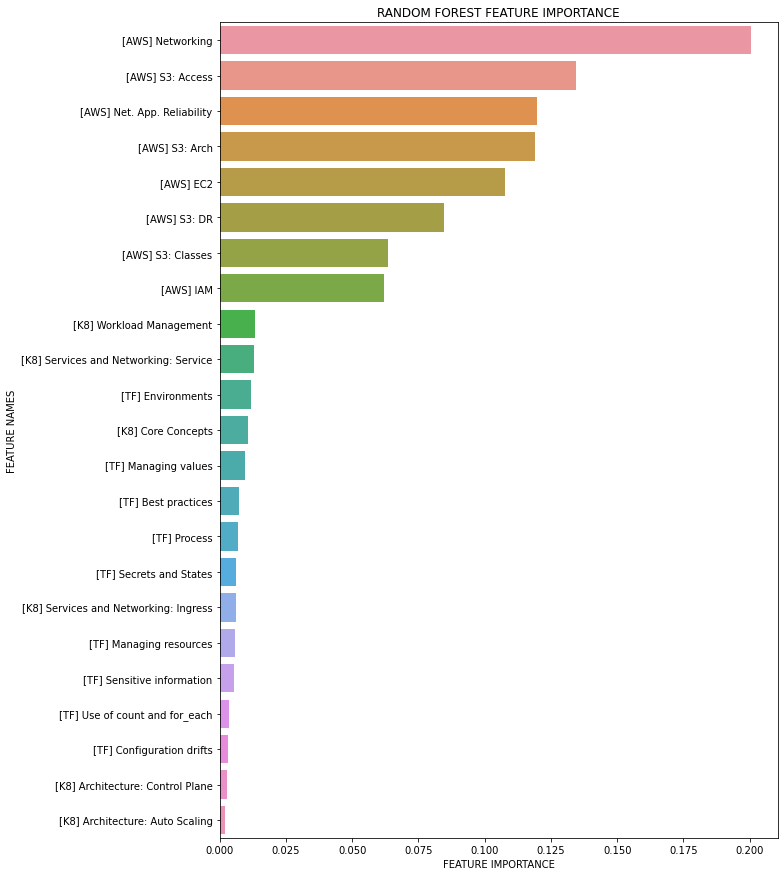

In [85]:
plot_feature_importances ( importances, names )

## Plot Decision tree

In [61]:
# for i in range (3, 7): 
decision_tree (X_train, y_train, X_test, y_test, rf_best_estimator)

/Users/Shared/Facultad/Proyecto/enviroment/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- [K8] Services & Networking: Ingress
- [K8] Services & Networking: Service
- [TF] Use of count & for_each
Feature names seen at fit time, yet now missing:
- [K8] Services and Networking: Ingress
- [K8] Services and Networking: Service
- [TF] Use of count and for_each

  warnings.warn(message, FutureWarning)


Accuracy: 0.7931
F1 score: 0.8000
[[11  2]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.86      0.75      0.80        16

    accuracy                           0.79        29
   macro avg       0.80      0.80      0.79        29
weighted avg       0.80      0.79      0.79        29

train_acc: 0.8928571428571429
test_acc: 0.7931034482758621
train_f1: 0.9
test_f1: 0.7999999999999999


## MLFlow

In [ ]:
run, runs = pd.DataFrame(), pd.DataFrame()
for i in range(0, 8):
    run = mlflow.search_runs(experiment_ids = str(i) )
    runs = runs.append(run)

runs = runs[runs['metrics.train_acc'].notna()]
runs.drop_duplicates(inplace = True)
runs.reset_index(inplace = True)
runs.drop(columns = ['index'], axis = 1 )
runs.to_csv('../../outputs/files/runs.csv', encoding = 'UTF-8')